## Credit Card Fraud Detection
As we are moving towards the digital world — cybersecurity is becoming a crucial part of our life. When we talk about security in digital life then the main challenge is to find the abnormal activity.

When we make any transaction while purchasing any product online — a good amount of people prefer credit cards. The credit limit in credit cards sometimes helps us me making purchases even if we don’t have the amount at that time. but, on the other hand, these features are misused by cyber attackers.

To tackle this problem we need a system that can abort the transaction if it finds fishy.

Here, comes the need for a system that can track the pattern of all the transactions and if any pattern is abnormal then the transaction should be aborted.

Today, we have many machine learning algorithms that can help us classify abnormal transactions. The only requirement is the past data and the suitable algorithm that can fit our data in a better form.

In this article, I will help you in the complete end-to-end model training process — finally, you will get the best model that can classify the transaction into normal and abnormal types.

## Importing Necessary Libraries
It is a good practice to import all the necessary libraries in one place — so that we can modify them quickly.

In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import sys
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

<Figure size 432x216 with 0 Axes>

In [2]:
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

In [3]:
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Importing Dataset
Importing the dataset is pretty much simple. You can use pandas module in python to import it. Run the below command to import your data.

In [4]:
data=pd.read_csv(r"C:\Users\Vandana Rawat\Downloads\creditcard.csv")

In [5]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data Processing & Understanding
The one main thing you will notice about this data is that — the dataset is imbalanced towards a feature. Which seems pretty valid for such kind of data. Because today many banks have adopted different security mechanisms — so it is harder for hackers to make such moves.

Still, sometimes when there is some vulnerability in the system — the chance of such activities can increase. That’s why we can see the majority of transactions belongs to our datasets are normal and only a few percentages of transactions are fraudulent.

Let’s check the transaction distribution.

In [6]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Transactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Transactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As per the count per column, we have no null values. Also, feature selection is not the case for this use case. Anyway, you can try applying feature selection mechanisms to check if the results are optimised.

In [8]:
min(data.Amount), max(data.Amount)

(0.0, 25691.16)

In this case, it is a good practice to scale this variable. We can use a standard scaler to make it fix.

We have one more variable which is the time which can be an external deciding factor — but in our modelling process, we can drop it.

In [9]:
data.drop(['Time'], axis=1, inplace=True)

We can also check for any duplicate transactions. Before removing any duplicate transaction, we are having 284807 transactions in our data. Let’s remove the duplicate and observe the changes.

In [10]:
data.shape

(284807, 30)

Run the below line of code to remove any duplicates.

In [11]:
data.drop_duplicates(inplace=True)

Let’s now check the count again.

In [12]:
data.shape

(275663, 30)

So, we were having around ~9000 duplicate transactions.

Here we go!! We now have properly scaled data with no duplicate, no missing. Let’s now split it for our model building.

## Train & Test Split
Before splitting train & test — we need to define dependent and independent variables. The dependent variable is also known as X and the independent variable is known as y.

In [13]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

Now, let split our train and test data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [15]:
X_train.shape

(206747, 29)

In [16]:
X_test.shape

(68916, 29)

That’s it. We now have two different data set — Train data we will be used for training our model and the data which is unseen will be used for testing.

In [17]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
pd.DataFrame(X_train_sc).describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,...,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05,2.067470e+05
mean,-1.566616e-16,-1.871538e-17,-3.707280e-16,-8.870099e-18,7.565360e-17,-1.367031e-17,1.631204e-16,-1.164838e-17,2.950100e-16,-5.331403e-17,...,-7.283061e-17,-4.675624e-17,-5.579066e-17,4.946001e-17,5.148986e-17,-1.900375e-17,-2.458367e-18,2.937905e-18,6.134991e-17,2.134604e-14
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.874928e+01,-4.332219e+01,-2.183402e+01,-3.983620e+00,-3.080869e+01,-1.998104e+01,-3.542551e+01,-6.088327e+01,-1.217871e+01,-2.257263e+01,...,-3.605567e+01,-4.706604e+01,-1.502692e+01,-6.975040e+01,-4.665413e+00,-1.960773e+01,-5.383030e+00,-5.644715e+01,-3.521891e+01,-3.601148e-01
25%,-4.595618e-01,-3.650834e-01,-5.759308e-01,-6.023399e-01,-5.046405e-01,-5.761804e-01,-4.555468e-01,-1.690558e-01,-5.875225e-01,-4.963978e-01,...,-2.770664e-01,-3.079469e-01,-7.419553e-01,-2.546320e-01,-5.849611e-01,-6.072028e-01,-6.775440e-01,-1.835488e-01,-1.607109e-01,-3.345474e-01
50%,-9.319794e-03,4.227001e-02,1.164671e-01,-2.176995e-02,-3.745080e-02,-1.970868e-01,3.050364e-02,2.463316e-02,-4.691107e-02,-8.770219e-02,...,-7.900401e-02,-3.894095e-02,9.530176e-03,-1.799492e-02,7.494371e-02,2.759556e-02,-1.163264e-01,2.289839e-03,3.269790e-02,-2.651331e-01
75%,6.788767e-01,4.887747e-01,6.783562e-01,5.293938e-01,4.505689e-01,3.077239e-01,4.691788e-01,2.742078e-01,5.513003e-01,4.295245e-01,...,1.751062e-01,2.528760e-01,7.272820e-01,2.300410e-01,7.276185e-01,6.698830e-01,5.019209e-01,2.314007e-01,2.417492e-01,-4.175702e-02
max,1.268704e+00,1.314282e+01,6.194181e+00,1.183674e+01,2.545224e+01,1.828493e+01,3.581913e+01,1.664363e+01,1.416673e+01,2.179198e+01,...,5.073488e+01,3.055278e+01,1.441985e+01,3.507404e+01,6.651130e+00,1.433764e+01,7.267420e+00,2.784859e+01,1.017827e+02,7.792121e+01


In [18]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

## Plotting the Correlation Matrix
The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

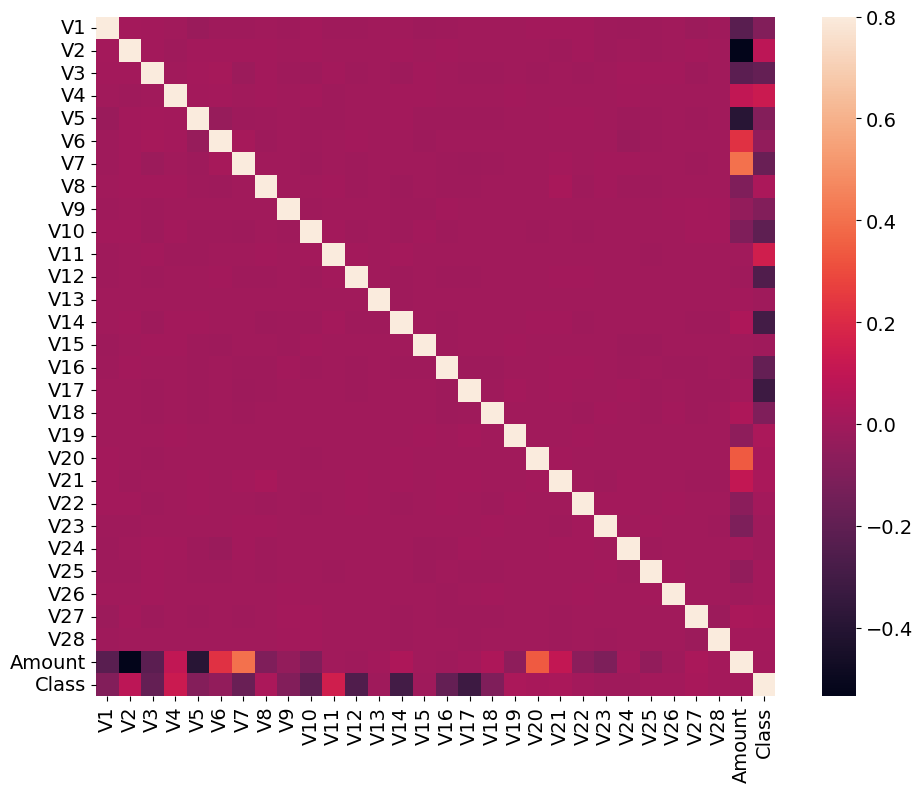

In [19]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

## Model Building
We will be trying different machine learning models one by one. Defining models are much easier. A single line of code can define our model. And, in the same way, a single line of code can fit the model on our data.

We can also tune these models by selecting different optimized parameters. But, if the accuracy is better even with less parameter tuning then — no need to make it complex.

## Perceptron
Perceptron model is also treated as one of the best and simplest types of Artificial Neural networks. However, it is a supervised learning algorithm of binary classifiers. Hence, we can consider it as a single-layer neural network with four main parameters, i.e., input values, weights and Bias, net sum, and an activation function.

In [20]:
from sklearn.linear_model import Perceptron
P=Perceptron() 

In [21]:
P.fit(X_train_sc,y_train)
Perceptron()

Perceptron()

In [22]:
test_predict=P.predict(X_test)
train_predict=P.predict(X_train_sc)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_predict))

0.9993083333736402


In [24]:
print(accuracy_score(y_test,test_predict))

0.998636020662836


In [25]:
p1=Perceptron(penalty='elasticnet')
p1.fit(X_train_sc,y_train)
Perceptron(penalty='elasticnet')

Perceptron(penalty='elasticnet')

In [26]:
train_predict_elasticnet= p1.predict(X_train_sc)
test_predict_en= p1.predict(X_test)

In [27]:
print("Training accuracy",accuracy_score(y_train,train_predict))
print(accuracy_score(y_test,test_predict))

Training accuracy 0.9993083333736402
0.998636020662836


## Support Vector Machines
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

In [28]:
from sklearn.svm import SVC
svc=SVC()
X_train_sc.shape

(206747, 29)

In [29]:
y_train.shape

(206747,)

In [30]:
y_train.shape
svc.fit(X_train_sc,y_train)

SVC()

In [31]:
train_pred_svc=svc.predict(X_train_sc)
test_pred_svc=svc.predict(X_test)

In [32]:
print("Training",accuracy_score(train_pred_svc,y_train))

Training 0.9997049533971473


In [33]:
print("Test",accuracy_score(test_pred_svc,y_test))

Test 0.9984618956410702


In [34]:
svc1=SVC(kernel="rbf",C=0.5)
svc1.fit(X_train_sc,y_train)
train_pred_svc1=svc1.predict(X_train_sc)
test_pred_svc1=svc1.predict(X_test
                            )

KeyboardInterrupt: 

In [ ]:
print("Training",accuracy_score(train_pred_svc1,y_train))

In [ ]:
print("Test",accuracy_score(test_pred_svc1,y_test))

## K-Nearest Neighbor(KNN)
* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
* K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_sc,y_train)
train_pred_knn=knn.predict(X_train_sc)
test_pred_knn=knn.predict(X_test)

In [ ]:
print("Training accuracy:",accuracy_score(train_pred_knn,y_train))
print("testing accuracy:",accuracy_score(test_pred_knn,y_test))

## Decision Tree Classification 
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_sc,y_train)
train_pred_dt=dt.predict(X_train_sc)
test_pred_dt=dt.predict(X_test)

In [ ]:
print("Training",accuracy_score(train_pred_dt,y_train))
print("testing",accuracy_score(test_pred_dt,y_test))

## Random Forest Classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_sc,y_train)
train_pred_rf=rf.predict(X_train_sc)
test_pred_rf=rf.predict(X_test)

In [ ]:
print("Training",accuracy_score(train_pred_rf,y_train))
print("Testing",accuracy_score(test_pred_rf,y_test))

In [ ]:
P=Perceptron()
svm=SVC()
knn=KNeighborsClassifier()

## Voting Classifier
A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vc=VotingClassifier(estimators=[('perceptron',P),('svm',svm),('knn',knn)],voting='hard', weights=[3,1,1])
vc.fit(X_train_sc,y_train)
train_pred_vc=vc.predict(X_train_sc)
test_pred_vc=vc.predict(X_test)

In [ ]:
print("Training",accuracy_score(train_pred_vc,y_train))
print("Testing",accuracy_score(test_pred_vc,y_test))

## Bagging Classifier
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator=knn,n_estimators=20)
bag.fit(X_train_sc,y_train)
train_pred_bag=bag.predict(X_train_sc)
test_pred_bag=bag.predict(X_test)

In [ ]:
print("Training",accuracy_score(train_pred_bag,y_train))
print("Testing",accuracy_score(test_pred_bag,y_test))